In [1]:
# Basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [38]:
# input features
X = df.drop(columns=['math_score'], axis=1)

In [39]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [40]:
y = df['math_score']

In [41]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [42]:
# Creating column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_tranformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_tranformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [43]:
X = preprocessor.fit_transform(X)

In [44]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [45]:
X.shape

(1000, 19)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((750, 19), (250, 19))

In [47]:
# create an Evaluate function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [48]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree ": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoostRegressor": AdaBoostRegressor()
}
model_list = []
r2_list = []



In [49]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # train model

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evalute_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evalute_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("Model performance for trianing set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-  Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 score: {:.4f}".format(model_train_r2))

    print('-'*35)
    print("Model performance for testing set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("-  Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')


Linear Regression
Model performance for trianing set
- Root Mean Squared Error: 5.3029
-  Mean Absolute Error: 4.2424
- R2 score: 0.8740
-----------------------------------
Model performance for testing set
- Root Mean Squared Error: 5.4515
-  Mean Absolute Error: 4.3234
- R2 score: 0.8792


Lasso
Model performance for trianing set
- Root Mean Squared Error: 6.5515
-  Mean Absolute Error: 5.1837
- R2 score: 0.8077
-----------------------------------
Model performance for testing set
- Root Mean Squared Error: 6.6541
-  Mean Absolute Error: 5.2217
- R2 score: 0.8200


Ridge
Model performance for trianing set
- Root Mean Squared Error: 5.2976
-  Mean Absolute Error: 4.2368
- R2 score: 0.8743
-----------------------------------
Model performance for testing set
- Root Mean Squared Error: 5.4788
-  Mean Absolute Error: 4.3354
- R2 score: 0.8780


K-Neighbors Regressor
Model performance for trianing set
- Root Mean Squared Error: 5.7926
-  Mean Absolute Error: 4.5885
- R2 score: 0.8497
----

In [50]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model Name,R2_score
0,Linear Regression,0.879203
2,Ridge,0.877990
7,CatBoost Regressor,0.854830
5,Random Forest Regressor,0.850210
8,AdaBoostRegressor,0.841293
6,XGBRegressor,0.836290
1,Lasso,0.820027
3,K-Neighbors Regressor,0.793248
4,Decision Tree,0.760397


Here R2 score is high for Linear Regression, So we choose Linear Regression for training our model.

In [53]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"Accuracy of the model is {score}.")

Accuracy of the model is 87.92029944089207.


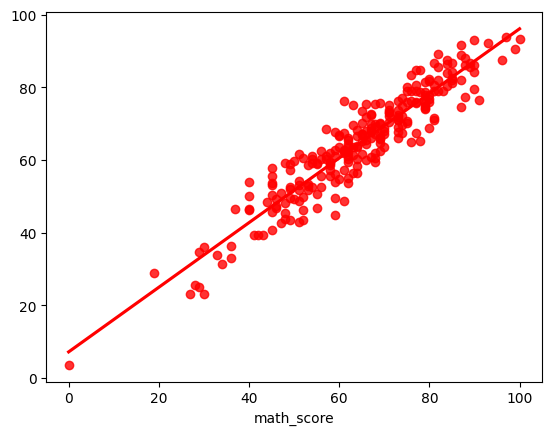

In [54]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [55]:
pred_df = pd.DataFrame({'Actual value': y_test, "Predicted value": y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual value,Predicted value,Difference
521,91,76.62500,14.37500
737,53,58.78125,-5.78125
740,80,76.84375,3.15625
660,74,77.03125,-3.03125
411,84,87.53125,-3.53125
...,...,...,...
109,70,63.71875,6.28125
430,64,63.46875,0.53125
77,80,82.34375,-2.34375
84,42,39.46875,2.53125
